# Transversal Pump

The Hamiltonian is
$$
H_\text{trans} = \frac{p^2}{2m} + V_\text{ext}(x) - \hbar \Delta_\text{c} a^\dagger a + \hbar \eta \cos(kx) (a + a^\dagger) + \hbar U_0 \cos(kx)^2,
$$
where $\Delta_\text{c} = \omega_\text{l} - \omega_\text{c}$, $\eta$ is the pump strength and $U_0$ is the depth of the potential. Note that because $H_\text{trans} \propto \cos(kx) + \cos(kx)^2$, the Hamiltoninan is $\lambda$-periodic.

In [1]:
using QuantumOptics, PyPlot, Printf, LinearAlgebra

We choose a maximum number of photons of $N_\text{cutoff}=16$. If we choose $k=2\pi$, then $\lambda=1$.

In [2]:
# Define Parameters
N_cutoff = 16
xmin = 0
xmax = 1
Nsteps = 64

k = 2*π
ωr = 1

Δc = -3 * ωr
U0 = -1 * ωr;

In [3]:
# Bases
b_position = PositionBasis(xmin, xmax, Nsteps)
b_fock = FockBasis(N_cutoff)

# Operators for atom
p = momentum(b_position)

# Operators for cavity
a = destroy(b_fock) ⊗ one(b_position)
ad = dagger(a);

In [4]:
# Hamiltonian and calculate states
potential = x -> U0*cos(k*x)^2
H_int = (one(b_fock) ⊗ potentialoperator(b_position, potential))*ad*a
H_kin = (one(b_fock) ⊗ p^2) / k^2
H_cavity = -Δc*ad*a

function H(η)
    pump = x -> η*cos(k*x)
    H_pump = (one(b_fock) ⊗ potentialoperator(b_position, pump)) * (a + ad)
    return H_kin + dense(H_int) + H_pump + H_cavity
end;

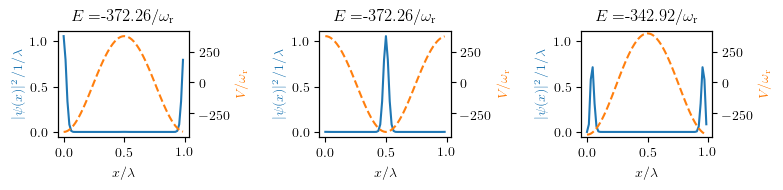

In [5]:
# Plot distributions for first three states

rc("text", usetex=true)
rc("text.latex", preamble= "\\usepackage{amsmath}")
rc("font", family="serif")
pygui(false)

η = 60 * ωr
E, ψ_states = eigenstates((H(η) + dagger(H(η)))/2, 3);

xpoints = samplepoints(b_position)

fig = figure(figsize=(8, 2))
host_1 = fig.add_subplot(131)
host_2 = fig.add_subplot(132)
host_3 = fig.add_subplot(133)
hosts = [host_1, host_2, host_3]

for i in 1:3
    host = hosts[i]
    par1 = host.twinx()
    
    pos_dense = ptrace(ψ_states[i], 1)
    density = diag(pos_dense.data)
    ada_exp = expect(ad*a, ψ_states[i])
    apad_exp = expect(a + ad, ψ_states[i])
    pot = @. U0*cos(k*xpoints)^2*real(ada_exp) + η*cos(k*xpoints)*real(apad_exp)
    
    host.set_ylim(-0.0528, 1.1088)
    par1.set_ylim(-441.482335, 415.316547)
    host.plot(xpoints, abs2.(normalize(density) ./ sqrt(Nsteps) * 15), "C0")
    par1.plot(xpoints, pot, "C1", linestyle="--")
    
    host.set_xlabel(L"x / \lambda")
    host.set_ylabel(L"|\psi(x)|^2 / 1/\lambda")
    par1.set_ylabel(L"V / \omega_\text{r}")
    host.yaxis.label.set_color("C0")
    par1.yaxis.label.set_color("C1")
    
    # Boundaries
#     println("host.set_ylim(" *@sprintf("%.4f", host.get_ylim()[1]) *", " *@sprintf("%.4f", host.get_ylim()[2]) *")")
#     println("par1.set_ylim(" *@sprintf("%.6f", par1.get_ylim()[1]) *", " *@sprintf("%.6f", par1.get_ylim()[2]) *")")
    
    title(L"E=" * @sprintf("%.2f", E[i]) * L"/ \omega_\text{r}")
end

tight_layout()

We can see that the ground state and the first excited state have the same energy and thus are degenerate states. The peaks are higher than with longitudinal pumping.

In [6]:
# # Generate movie distributions for first three states

# using PyCall
# anim = pyimport("matplotlib.animation")

# rc("text", usetex=true)
# rc("text.latex", preamble= "\\usepackage{amsmath}")
# rc("font", family="serif")


# xpoints = samplepoints(b_position)

# fig = figure(figsize=(10, 2.5))

# function animate(η)
#     η *= ωr
#     E, ψ_states = eigenstates((H(η) + dagger(H(η)))/2, 3);
    
#     clf()
#     host_1 = fig.add_subplot(131)
#     host_2 = fig.add_subplot(132)
#     host_3 = fig.add_subplot(133)
#     hosts = [host_1, host_2, host_3]

#     for i in 1:3
#         host = hosts[i]
#         par1 = host.twinx()

#         pos_dense = ptrace(ψ_states[i], 1)
#         density = diag(pos_dense.data)
#         ada_exp = expect(ad*a, ψ_states[i])
#         apad_exp = expect(a + ad, ψ_states[i])
#         pot = @. U0*cos(k*xpoints)^2*real(ada_exp) + η*cos(k*xpoints)*real(apad_exp)

#         host.set_ylim(-0.0000, 0.0007)
#         par1.set_ylim(-441.482335, 415.316547)
#         host.plot(xpoints, abs2.(density ./ sqrt(Nsteps)), "C0")
#         par1.plot(xpoints, pot, "C1", linestyle="--")

#         host.set_xlabel(L"x / \lambda, \eta=" * @sprintf("%d", η) * L"\omega_\text{r}")
#         host.set_ylabel(L"|\psi(x)|^2 / 1/\lambda")
#         par1.set_ylabel(L"V / \omega_\text{r}")
#         host.yaxis.label.set_color("C0")
#         par1.yaxis.label.set_color("C1")

#         # Boundaries
#     #     println("host.set_ylim(" *@sprintf("%.4f", host.get_ylim()[1]) *", " *@sprintf("%.4f", host.get_ylim()[2]) *")")
#     #     println("par1.set_ylim(" *@sprintf("%.6f", par1.get_ylim()[1]) *", " *@sprintf("%.6f", par1.get_ylim()[2]) *")")

#         if i == 1
#             title("GS, " * L"E=" * @sprintf("%.2f", E[1]) * L"/ \omega_\text{r}")
#         elseif i == 2
#             title("1st exc, " * L"E=" * @sprintf("%.2f", E[2]) * L"/ \omega_\text{r}")
#         else
#             title("2nd exc, " * L"E=" * @sprintf("%.2f", E[3]) * L"/ \omega_\text{r}")
#         end
#     end

#     tight_layout()
# end

# etas = [0:1:100;]
# movie = anim.FuncAnimation(fig, animate, frames=etas, repeat=false, interval=80)
# movie.save("trans_variable_pump.mp4")

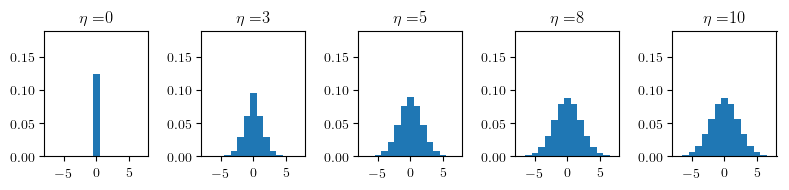

In [7]:
# Plot momentum

rc("text", usetex=true)
rc("font", family="serif")
pygui(false)

b_momentum = MomentumBasis(b_position)
Tpx = transform(b_momentum, b_position)

η_arr = [0, 3, 5, 8, 10] .* ωr

fig = figure(figsize=(8,2))
for i in 1:size(η_arr)[1]
    plt_index = 100 + size(η_arr)[1]*10 + i
    host = fig.add_subplot(plt_index)
    
    E, ψ_states = eigenstates((H(η_arr[i]) + dagger(H(η_arr[i])))/2, 1);
    pos_dense = ptrace(ψ_states[1], 1)
    states_p = Tpx * pos_dense
    density_p = diag(states_p.data)

    host.bar([-Nsteps/2:1:Nsteps/2-1;], abs.(density_p), width=1)
    title_string = L"\eta=" * @sprintf("%d", η_arr[i])
    title(title_string)
    host.set_ylim(0.0000, 0.1893)
    host.set_xlim(-8, 8)
#     println("host.set_ylim(" *@sprintf("%.4f", host.get_ylim()[1]) *", " *@sprintf("%.4f", host.get_ylim()[2]) *")")
end

# tight_layout(rect=[0, 0, 1.5, 1.6])
tight_layout()

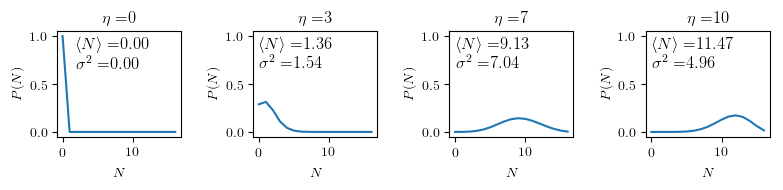

In [14]:
# Plot photon number

rc("text", usetex=true)
rc("font", family="serif")
pygui(false)

η_arr = [0, 3, 7, 10] .* ωr
X = [0:1:N_cutoff;]
displace = [0.15, 0.05, 0.05, 0.05]

fig = figure(figsize=(8, 2))
for i in 1:size(η_arr)[1]
    plt_index = 100 + size(η_arr)[1]*10 + i
    host = fig.add_subplot(plt_index)
    
    E, ψ_states = eigenstates((H(η_arr[i]) + dagger(H(η_arr[i])))/2, 1);
    photon_dense = ptrace(ψ_states[1], 2)
    probab = diag(photon_dense.data)
    
    host.plot(X, probab)
    ada_exp = expect(ad*a, ψ_states[1])
    variance = real(sum(probab .* X.^2) - ada_exp^2)
    
    title_string = L"\eta=" * @sprintf("%d", η_arr[i])
    title(title_string)
    
    host.set_xlabel(L"N")
    host.set_ylabel(L"P(N)")
    textstr = L"\langle N \rangle=" * @sprintf("%.2f", real(ada_exp)) * "\n" * L"\sigma^2=" * @sprintf("%.2f", variance)
    host.text(displace[i], 0.95, textstr, transform=host.transAxes, fontsize=12, verticalalignment="top")
    
    host.set_ylim(-0.0500, 1.0500)
#     println("host.set_ylim(" *@sprintf("%.4f", host.get_ylim()[1]) *", " *@sprintf("%.4f", host.get_ylim()[2]) *")")
   
    
end
tight_layout()

Longitudinal and transversal photon number densities are the same.

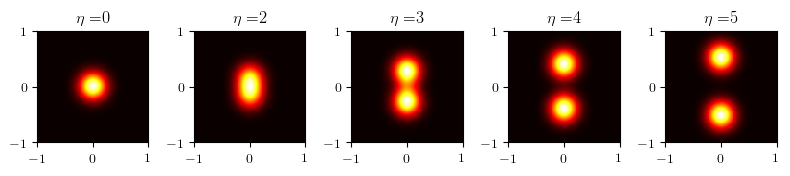

In [9]:
# Qfunc

rc("text", usetex=true)
rc("font", family="serif")
pygui(false)

η_arr = [0, 2, 3, 4, 5] .* ωr

# Boundary
bdr = 6
xvec = [-bdr:.1:bdr;]
yvec = [-bdr:.1:bdr;]

fig = figure(figsize=(8, 2))

for i in 1:size(η_arr)[1]
    E, ψ_states = eigenstates((H(η_arr[i]) + dagger(H(η_arr[i]))) / 2, 1);

    plt_index = 100 + size(η_arr)[1] * 10 + i
    subplot(plt_index)
    husimi_q = qfunc(ptrace(ψ_states[1], 2), xvec, yvec)
    imshow(abs.(husimi_q), cmap="hot", interpolation="nearest", extent=(-1,1,-1,1));
    title_string = L"\eta=" * @sprintf("%d", η_arr[i])
    title(title_string)
end

tight_layout();

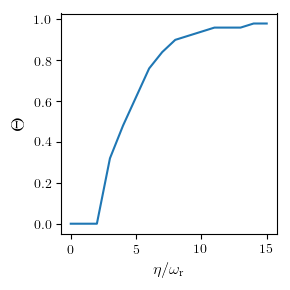

In [10]:
# Plot order parameter
rc("text", usetex=true)
rc("text.latex", preamble= "\\usepackage{amsmath}")
rc("font", family="serif")
pygui(false)

η_arr = [0:1:15;] .* ωr
bdr = 6
step = 0.1
xvec = [-bdr:step:bdr;]
yvec = [-bdr:step:bdr;]

order_param_arr = []
for i in 1:size(η_arr)[1]
    E, ψ_states = eigenstates((H(η_arr[i]) + dagger(H(η_arr[i]))) / 2, 1);
    husimi_q = qfunc(ptrace(ψ_states[1], 2), xvec, yvec)
#     husimi_q_sub = husimi_q[1:trunc(Int, bdr/step+1),:]
#     temp = abs(findmax(abs.(husimi_q_sub))[2][1] - (bdr/step+1)) / 50
    temp = abs(findmax(abs.(husimi_q))[2][1] - (bdr/step+1)) / 50
    push!(order_param_arr, temp)
end

figure(figsize=(3,3))
plot(η_arr, order_param_arr)
xlabel(L"\eta / \omega_\text{r}", fontsize=12)
ylabel(L"\Theta", fontsize=14)
tight_layout()
# title("Order parameter transversal");

There's clearly a threshold at which the order parameter starts to rise quickly.